In [ ]:
# problem statement
#(1)customer Segmentaion(clustering)on the basis of their buying pattern(recency,frecuency,monetary)
(2)identify the business trend-Day,Month,season,time by invoice count.
(3)

In [1]:
# import basic library
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_excel('online_shopping.xlsx')


In [3]:
df=data.copy()

In [4]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
# this solve the first problem statement (clustering)
# RFM. we drop unwanted columns

In [7]:
df1=df.drop(['StockCode','lower','Description','Country'],axis=1)

In [8]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [9]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [10]:
# we cannot impute customer id as we are working on cusomer clustering
#

In [11]:
df1.dropna(axis=0,inplace=True)

In [12]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [14]:
# the quantity is can be negative because of return or defective iteam
#unit price can be 0 because of offers


In [15]:
df1[df1["UnitPrice"] == 0]['UnitPrice'].count()


40

In [16]:
# we want to continue with only those observation having positive

In [17]:
df1[df1["UnitPrice"] > 0]["UnitPrice"].count()

406789

In [18]:
df1[df1["Quantity"] > 0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [19]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [20]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [21]:
df1['total']=df1['Quantity']*df['UnitPrice']# generate total price

In [22]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [23]:
# we can drop quantity , unit price not requared

In [24]:

df2 = df1.drop(['Quantity', 'UnitPrice'], axis=1)
df2.head(100)

,InvoiceNo,InvoiceDate,CustomerID,total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
95,536378,2010-12-01 09:37:00,14688.0,15.30
96,536378,2010-12-01 09:37:00,14688.0,50.40
97,536378,2010-12-01 09:37:00,14688.0,13.20
98,536378,2010-12-01 09:37:00,14688.0,13.20


In [25]:
# groupby approach

In [26]:
df_final=df2.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({'total':'sum'}).reset_index()


In [27]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
22216,C581484,2011-12-09 09:27:00,16446.0,-168469.60
22217,C581490,2011-12-09 09:57:00,14397.0,-32.53
22218,C581499,2011-12-09 10:28:00,15498.0,-224.69
22219,C581568,2011-12-09 11:57:00,15311.0,-54.75


In [28]:
# now we want to calculate Recency,Frecuency,Monetary
# Recency=(last business date as per record) -last purchased date (of partucular customer)
# Frecuency=counting invoice number with respect to a partucular customer
# Monitary=Summation of total

In [29]:
# we will use groupby--keeping customer_id as reference

In [30]:
# calcualte the last business date as per dataset

In [31]:
max(df_final['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [32]:
min(df_final['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

In [33]:
# last business date as per dataset=2011-12-09 12:50:00
# we have 12 month of data(approax)

In [34]:
# basically we want the recency in days--not in hour, minute etc..

latest_date or date of business--if we add 1 day extra the recency will be only in days not in hour or minutes


In [35]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [36]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [37]:
# we will use groupby--keeping customer_id as reference

In [38]:
RFM_score=df_final.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,"InvoiceNo":lambda x:x.count(),"total": lambda x:x.sum()}).reset_index()


In [39]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,total
0,12346.0,325,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [40]:
# lets rename

In [41]:
RFM_score = RFM_score.rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "total": "Monetary"})


In [42]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [43]:
RFM_score.shape

(4372, 4)

In [44]:
# lets find the marks on basis on ranking in individual R F M

In [45]:
RFM_score["R_marks"]=RFM_score['Recency'].rank(ascending=False)
RFM_score["R_marks"]

0        169.0
1       4171.0
2       1642.5
3       3177.5
4        238.0
         ...  
4367     365.0
4368     864.0
4369    3829.0
4370    4067.0
4371    2349.0
Name: R_marks, Length: 4372, dtype: float64

In [46]:
# Frequency mark with respect to rank
RFM_score["F_marks"]=RFM_score['Frequency'].rank(ascending=False)
RFM_score["F_marks"]

0       2652.0
1        814.0
2       1566.5
3       3717.0
4       3717.0
         ...  
4367    3717.0
4368    3717.0
4369    1998.0
4370     227.5
4371    1998.0
Name: F_marks, Length: 4372, dtype: float64

In [47]:
RFM_score["M_marks"]=RFM_score['Monetary'].rank(ascending=False)

In [48]:
RFM_score["M_marks"]

0       4325.5
1        319.0
2        979.0
3       1007.0
4       3076.0
         ...  
4367    3748.0
4368    4214.0
4369    3774.0
4370     829.0
4371     959.0
Name: M_marks, Length: 4372, dtype: float64

In [49]:
RFM=RFM_score.copy()

In [50]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks
0,12346.0,325,2,0.00,169.0,2652.0,4325.5
1,12347.0,2,7,4310.00,4171.0,814.0,319.0
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0
4,12350.0,310,1,334.40,238.0,3717.0,3076.0


In [51]:
# lets convert the marks with respetc to 100 marks

In [52]:
RFM["R_final"]=(RFM["R_marks"]/RFM["R_marks"].max())*100

In [53]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.881934
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.807971
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.728265
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.987252
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.466866


In [54]:
RFM["F_final"]=(RFM["F_marks"]/RFM["F_marks"].max())*100

In [55]:
RFM["M_final"]=(RFM["M_marks"]/RFM["M_marks"].max())*100

In [56]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.881934,71.347861,98.936414
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.807971,21.899381,7.296432
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.728265,42.144202,22.392498
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.987252,100.000000,23.032937
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.466866,100.000000,70.356816


In [57]:
# creamos new_column name
RFM["RFM_final"]=0.20*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]


In [58]:
RFM=RFM.round(2)
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27
5,12352.0,36,11,1545.41,2484.0,431.0,1130.0,57.06,11.60,25.85,27.81
6,12353.0,204,1,89.00,732.0,3717.0,4199.0,16.81,100.00,96.04,81.38
7,12354.0,232,1,1079.40,611.0,3717.0,1530.0,14.03,100.00,35.00,50.30
8,12355.0,214,1,459.40,680.5,3717.0,2642.0,15.63,100.00,60.43,63.34
9,12356.0,22,3,2811.43,3009.5,1998.0,582.0,69.13,53.75,13.31,36.61


In [59]:
# lets we want to create 4 groups 

In [60]:
loyalty_label=["Silver","Gold","Diamond","Platinum"]

In [61]:
Quantal=RFM["RFM_final"].quantile(q=[0.25,0.50,0.75])

In [62]:
Quantal

0.25    34.7975
0.50    53.1350
0.75    70.5950
Name: RFM_final, dtype: float64

In [63]:
# lets visualaze the percentile to decide the quantile
# ecdf --empirical cumulative distribution plot

<AxesSubplot:xlabel='RFM_final', ylabel='Proportion'>

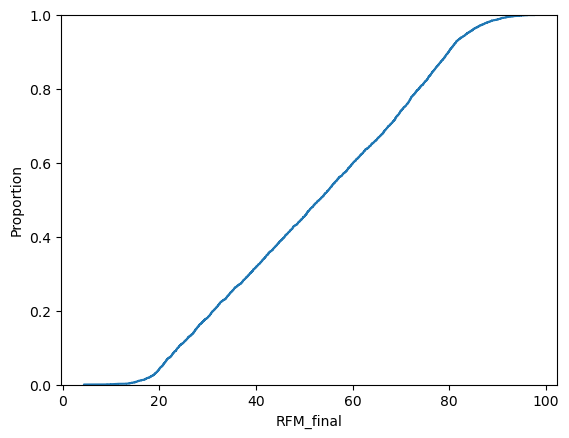

In [64]:
sns.ecdfplot(data=RFM["RFM_final"])

In [65]:
# write a function to assign the customer in differernt group as per their marks and quantile approach



In [66]:
def loyalty(x):
    if x<=31:
        return"Silver"
    elif x<=54:
        return"Gold"
    elif x<=78:
        return"Diamond"
    else:
        return"Platinum"

In [67]:
RFM["Loyalty"]=RFM["RFM_final"].apply(loyalty)

In [68]:
RFM.head(100)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyalty
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65,Diamond
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38,Silver
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39,Gold
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11,Diamond
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27,Diamond
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,2,4,1124.01,4171.0,1566.5,1480.0,95.81,42.14,33.85,48.73,Gold
96,12463.0,46,7,1303.63,2240.5,814.0,1325.0,51.46,21.90,30.31,32.02,Gold
97,12464.0,10,8,1212.05,3567.0,678.5,1403.0,81.93,18.25,32.09,37.91,Gold
98,12465.0,7,3,733.89,3829.0,1998.0,2002.0,87.95,53.75,45.79,56.61,Diamond


In [69]:
RFM["Loyalty"].value_counts()

Diamond     1564
Gold        1372
Silver       864
Platinum     572
Name: Loyalty, dtype: int64

In [70]:
# we can do the customer segmentation with kmeans clustering algoritm

In [71]:
Newdata=RFM["RFM_final"]
Newdata


0       71.65
1       29.38
2       31.39
3       56.11
4       66.27
        ...  
4367    74.54
4368    82.16
4369    76.88
4370    30.00
4371    37.88
Name: RFM_final, Length: 4372, dtype: float64

In [72]:
new_data=pd.DataFrame(Newdata)
new_data

,RFM_final
0,71.65
1,29.38
2,31.39
3,56.11
4,66.27
...,...
4367,74.54
4368,82.16
4369,76.88
4370,30.00


In [73]:
from sklearn.cluster import KMeans

In [74]:
kmeans1=KMeans(n_clusters=4,max_iter=100,random_state=100)

In [75]:
y_kmeans=kmeans1.fit_predict(new_data)
y_kmeans

array([2, 1, 1, ..., 2, 1, 3], dtype=int32)

In [76]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyalty
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65,Diamond
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38,Silver
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39,Gold
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11,Diamond
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27,Diamond


In [77]:
RFM["Cluster"]=kmeans1.labels_

In [78]:
RFM["Cluster"].value_counts()

2    1119
1    1094
3    1081
0    1078
Name: Cluster, dtype: int64

In [79]:
RFM["Loyalty"].value_counts()

Diamond     1564
Gold        1372
Silver       864
Platinum     572
Name: Loyalty, dtype: int64

In [80]:
# how to find the best no. of cluster----elbow method---sse error calculate

# calculate the silhoute score

In [81]:
# find no of clusters

In [82]:
from sklearn.cluster import KMeans


Text(0, 0.5, 'sum of square error')

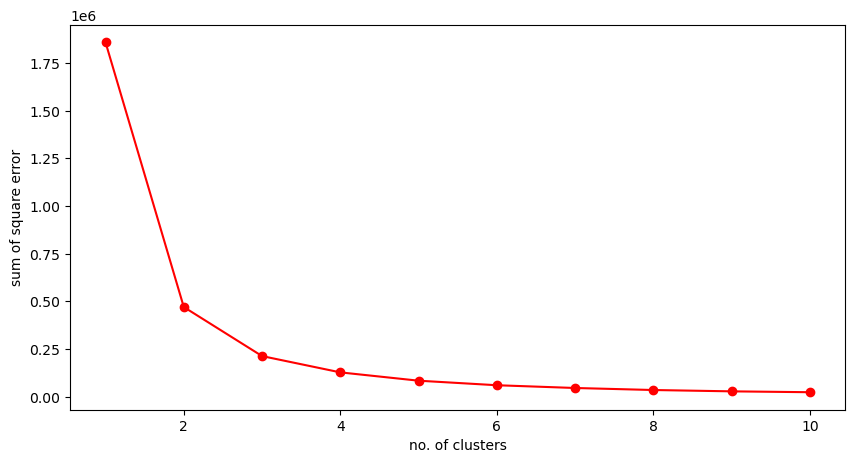

In [83]:
SSE=[]
for i in range (1,11):
    km=KMeans(n_clusters=i, max_iter=500)
    km.fit(new_data)
    # append SSE
    SSE.append(km.inertia_)
# plot the graph -- elbow approach  x axis- no. of cluster, Y axis-- SSE

plt.figure(figsize=(10,5))
plt.plot(range (1,11),SSE,color = 'r',marker='o')
plt.xlabel("no. of clusters")
plt.ylabel("sum of square error")

    



In [84]:
# as per the elbow method --we found that no. of best clusters = 3

In [85]:
km1=KMeans(n_clusters=3)
km1.fit(new_data)
y=km1.predict(new_data)
RFM['Label']=y
RFM.head(100)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyalty,Cluster,Label
0,12346.0,325,2,0.00,169.0,2652.0,4325.5,3.88,71.35,98.94,71.65,Diamond,2,0
1,12347.0,2,7,4310.00,4171.0,814.0,319.0,95.81,21.90,7.30,29.38,Silver,1,1
2,12348.0,75,4,1797.24,1642.5,1566.5,979.0,37.73,42.14,22.39,31.39,Gold,1,1
3,12349.0,18,1,1757.55,3177.5,3717.0,1007.0,72.99,100.00,23.03,56.11,Diamond,0,2
4,12350.0,310,1,334.40,238.0,3717.0,3076.0,5.47,100.00,70.36,66.27,Diamond,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,2,4,1124.01,4171.0,1566.5,1480.0,95.81,42.14,33.85,48.73,Gold,3,2
96,12463.0,46,7,1303.63,2240.5,814.0,1325.0,51.46,21.90,30.31,32.02,Gold,1,1
97,12464.0,10,8,1212.05,3567.0,678.5,1403.0,81.93,18.25,32.09,37.91,Gold,3,1
98,12465.0,7,3,733.89,3829.0,1998.0,2002.0,87.95,53.75,45.79,56.61,Diamond,0,2


In [86]:
RFM['Label'].value_counts()

0    1547
2    1437
1    1388
Name: Label, dtype: int64

<AxesSubplot:xlabel='RFM_final', ylabel='Loyalty'>

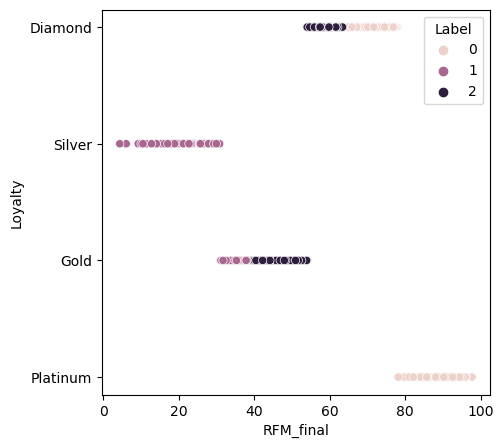

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.scatterplot(x='RFM_final', y = 'Loyalty',hue='Label', data=RFM)

In [ ]:
# evaluate the cluster use silhoutte score (-1 to +1) most of time it will be 0 to 1
# around 0.5 conssidere as good cluster
# it is around 0,that means there is some overlapping


In [95]:
from sklearn.metrics import silhouette_score

In [96]:
silhouette_score(new_data,km1.labels_)

0.5907513634008467

In [98]:
cust0=RFM[RFM["Label"]==0]
print("the customer in  group 0 are ",cust0["CustomerID"].values)

the customer in  group 0 are  [12346. 12350. 12353. ... 18280. 18281. 18282.]


In [99]:
cust1=RFM[RFM["Label"]==1]
print("the customer in  group 0 are ",cust1["CustomerID"].values)

the customer in  group 0 are  [12347. 12348. 12352. ... 18272. 18283. 18287.]


In [100]:
cust2=RFM[RFM["Label"]==2]
print("the customer in  group 0 are ",cust2["CustomerID"].values)

the customer in  group 0 are  [12349. 12354. 12355. ... 18252. 18263. 18265.]
